### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost 
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
import lightgbm as lgb
import pickle

from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import RandomizedSearchCV

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

# FINDINGS OF THE DATASET

### A. Market in Locations

1. **Location** wise the shops are distributed in three type of locations i,e **Tier-1**, **Tier-2** & **Tier-3.**


2. **Size** wise **four** types of shops are there (1).**Super Market-1** (2).**Super Market-2** (3).**Super Market-3** & (4).**Grocery Shops.**


3. **Super Market-1** are in three sizes **Small**,  **Medium**  & **High**  where **Super Market-2**  &  **Super Market-3** are all **medium** size and **Grocery shops** are all **small** sized.


4. **Number** wise Markets in **Tier-2** Location are **Maximum**


5. **Super Market-1** are located in all locations i,e **Tier-1**, **Tier-2** & **Tier-3**.


6. But **Super Market-2** & **Super Market-3** are located only on  **Tier-3** locations.


7. **Grocery Shops** are located on **Tier-1** & **Tier-3** locations.

### B. Items in Market

1. As a hole **Dairy Items** are **maximum** in the Market and next highest items are **Soft Drinks** where **lowest items** are **Seafood**.


2. In  **Super marke-1**, **Dairy Items** are **maximum** but next highest items are **Meats** and lowest items are **seafood**. 


3. In  **Super marke-2**, **Soft Drinks** and **Baking Goods** are highest where as **Breakfast Items** are lowest. 


4. In  **Super marke-3**, **Snak Foods** and **Hard Drinks** are highest where **Bread items** are lowest. 


5. In  **Grocery Shops**, **Fruits & Vegetables** and **Baking Goods** are highest where **Seafood** are Lowest.

### C. Sales

1. As a hole **Sales** in **Strachy items** and **Seafood** has the higest comparing to other items, even items in **Seafood** are lowest in the market.


2. In **Super Market-1** sales in **seafood** and **Strachy items** are highest.  


3. In **Super Market-2** sales in **seafood** beating all.


4. In **Super Market-3** sales in **Break fast** and **Fruits & Vegetables** are highest. 


5. In **Grocery Shops** sales in **Break fast**,  **Meats**  & **Bread** are maximum.  

### D. Market Relations (statistical analysis)

1. Almost all the features are more or less related to the marke except **Item_Identifier** & **Outlet_Identifier**.  However **Item_Visibility** is almost constant to other features that I got from quasi constant calculations.


2. **Item_MRP** is highly related to the market **sales** also **Outlet_Type** & **Outlet_Size** are positively related to market **sales**.


3. **Item_Weight**  &  **Item_Type** are not that much related to **Market Sales**.


4. **Outlet_Location_Type** is negetively related to the  **Market Sales**. That means **Tier-3**
locations are more important than **Tier-1** locations.


5. **Super Market-3** in **Tier-3** locations are most important than other Markets.

In [2]:
df = pd.read_csv('Train.csv')
df.tail(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## Data cleaning:-

In [3]:
df.shape

(8523, 12)

In [4]:
print('Columns Names:\n',df.columns)

Columns Names:
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [5]:
print('Unique Item Types:',len(df['Item_Type'].unique()))

Unique Item Types: 16


In [6]:
print('Item Type Names:-\n')
for n in df['Item_Type'].unique():
    print(n)

Item Type Names:-

Dairy
Soft Drinks
Meat
Fruits and Vegetables
Household
Baking Goods
Snack Foods
Frozen Foods
Breakfast
Health and Hygiene
Hard Drinks
Canned
Breads
Starchy Foods
Others
Seafood


##### Replacement of null values

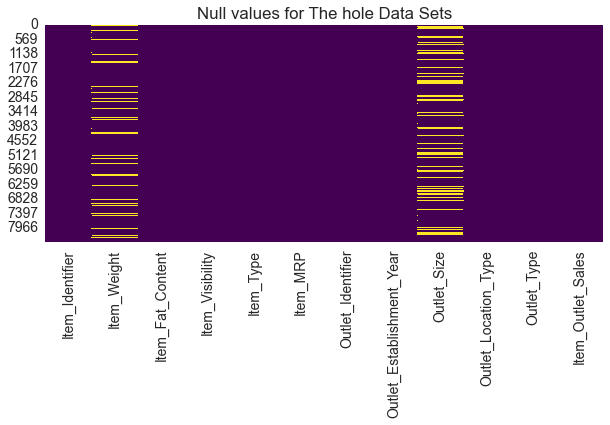

In [7]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The hole Data Sets')
plt.show()

In [8]:
supermarket1 = df[df['Outlet_Type'] =='Supermarket Type1']
supermarket2 = df[df['Outlet_Type'] =='Supermarket Type2']
supermarket3 = df[df['Outlet_Type'] =='Supermarket Type3']
grocery = df[df['Outlet_Type'] =='Grocery Store']

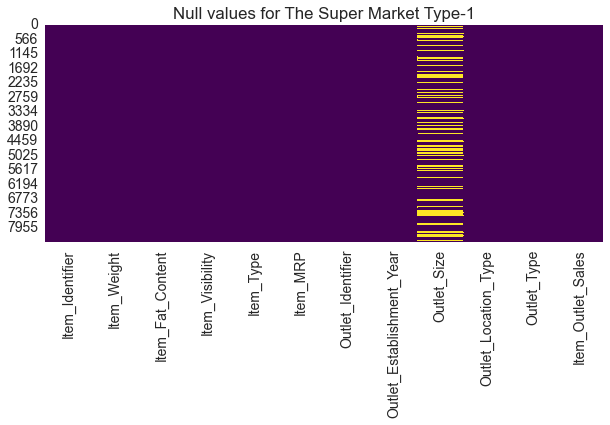

In [9]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(supermarket1.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The Super Market Type-1')
plt.show()

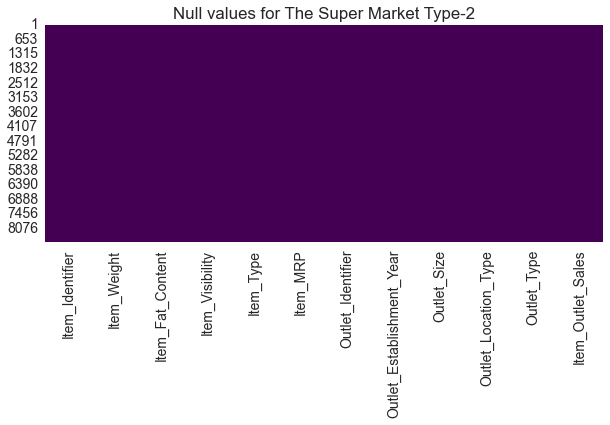

In [10]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(supermarket2.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The Super Market Type-2')
plt.show()

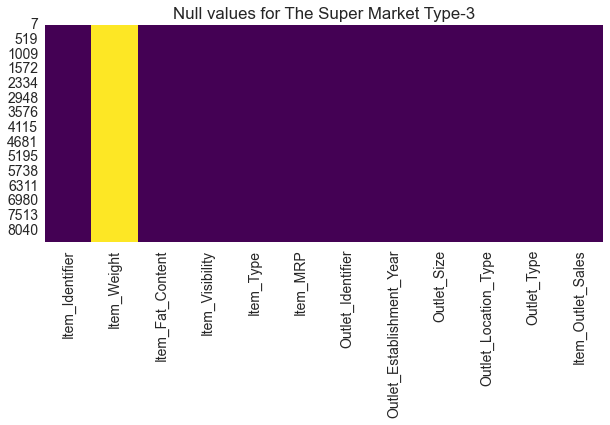

In [11]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(supermarket3.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The Super Market Type-3')
plt.show()

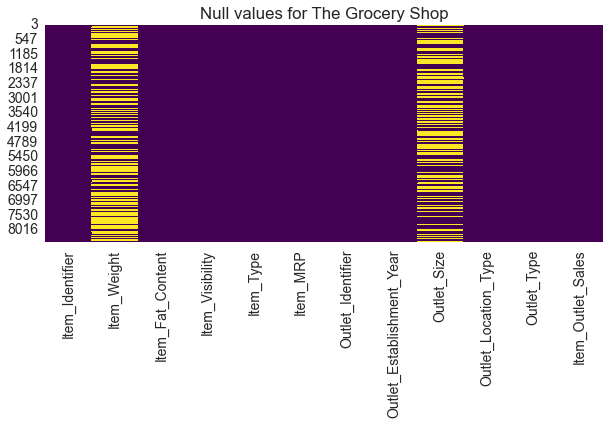

In [12]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(grocery.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The Grocery Shop')
plt.show()

In [13]:
print('Type of Outlet Size:',df.Outlet_Size.unique())

Type of Outlet Size: ['Medium' nan 'High' 'Small']


In [14]:
print('Outlet Locations:',df.Outlet_Location_Type.unique())

Outlet Locations: ['Tier 1' 'Tier 3' 'Tier 2']


In [15]:
supermarket1[supermarket1['Outlet_Location_Type'] == 'Tier 2'].isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
supermarket1[supermarket1['Outlet_Location_Type'] == 'Tier 2'].Outlet_Size.unique()

array([nan, 'Small'], dtype=object)

**here we can see that all the outlet sizes are 'Small' & 'nan' in suppermarket type-1 of Tier-2 city, so we can replace 'nan' values to 'small'...**

In [17]:
grocery['Outlet_Location_Type'].unique()

array(['Tier 3', 'Tier 1'], dtype=object)

In [18]:
grocery[grocery['Outlet_Location_Type'] == 'Tier 1'].isnull().sum()

Item_Identifier                0
Item_Weight                  528
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [19]:
grocery[grocery['Outlet_Location_Type'] == 'Tier 3'].isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [20]:
grocery[grocery['Outlet_Location_Type'] == 'Tier 3'].Outlet_Size.unique()

array([nan], dtype=object)

**here we can see that all the outlet sizes are  'nan' in grocery of Tier-3 city
so we can replace 'nan' values to 'small'...**

In [21]:
df.Outlet_Size.isnull().sum() == 555 + 1855

True

In [22]:
df.Outlet_Size.fillna("Small",inplace= True)

In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
df.Item_Weight.isna().sum()

1463

In [25]:
supermarket3.shape

(935, 12)

In [26]:
supermarket3.Item_Weight.isna().sum()

935

In [27]:
grocery.Item_Weight.shape

(1083,)

In [28]:
grocery.Item_Weight.isna().sum()

528

**So we found that In Super Market type-3 Item weights are not given to any item how ever in grocery shop almost 50% items have not given item weights....**

In [29]:
df.Item_Weight.mean()

12.857645184136183

In [30]:
grocery.Item_Weight.mean()

12.91315315315319

In [31]:
df.Item_Weight.fillna(grocery.Item_Weight.mean(), inplace = True)

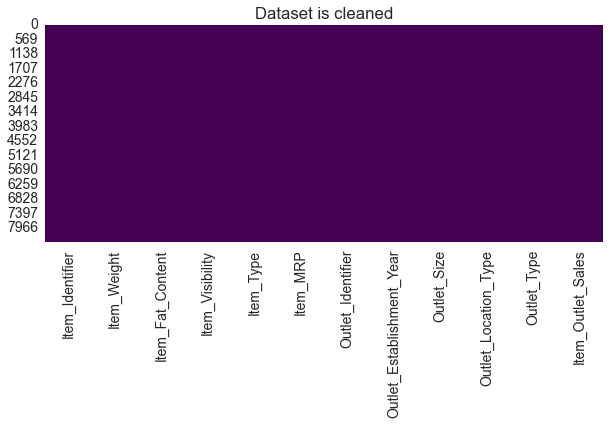

In [32]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.title('Dataset is cleaned')
plt.show()

##### Null values replaced

In [33]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [34]:
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [35]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

#### Mapping the duplicate names of Item_Fat_Content 

In [36]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':'low_fat','low fat':'low_fat','LF':'low_fat','reg':'regular','Regular':'regular'})

In [37]:
df.Item_Fat_Content.unique()

array(['low_fat', 'regular'], dtype=object)

In [38]:
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

# Story-line(EDA)

In [39]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.867173,0.066132,140.992782,1997.831867,2181.288914
std,4.226176,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.913153,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [40]:
print('Number of items per Item types:-\n')
print(df['Item_Type'].value_counts())

Number of items per Item types:-

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


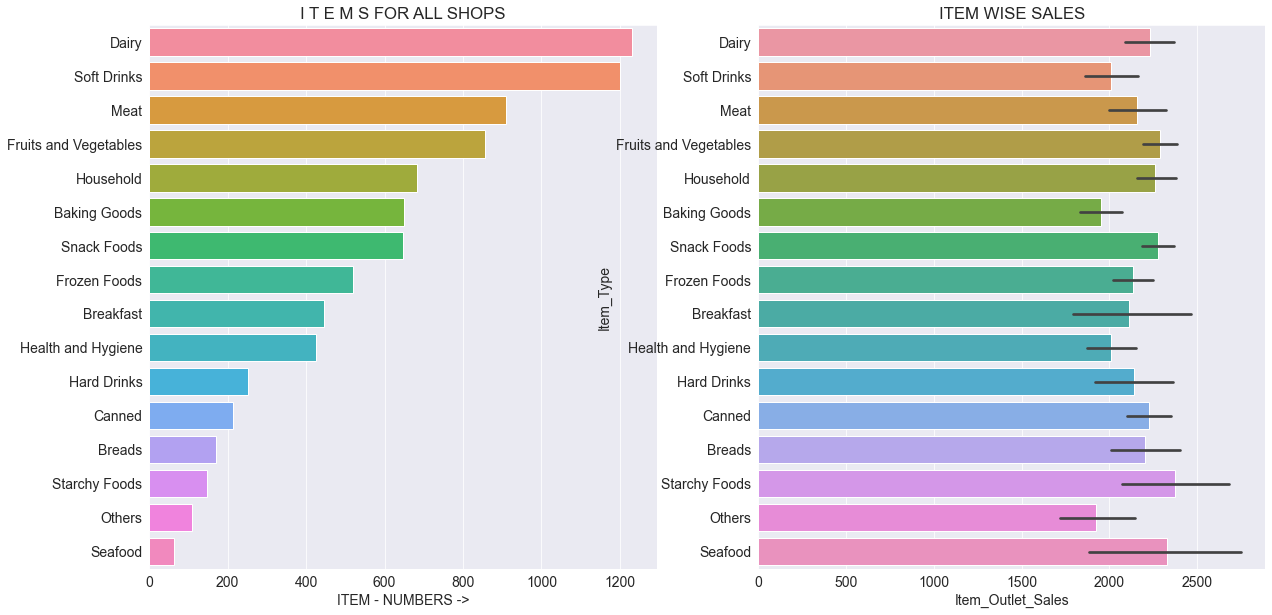

In [41]:
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(y=df['Item_Type'].unique(),x=df['Item_Type'].value_counts(),saturation=0.9, ax=ax1)
ax1.set_title('I T E M S FOR ALL SHOPS')
ax1.set_xlabel('ITEM - NUMBERS ->')
sns.barplot(y=df['Item_Type'],x=df['Item_Outlet_Sales'], ax= ax2)
ax2.set_title('ITEM WISE SALES')
plt.show()

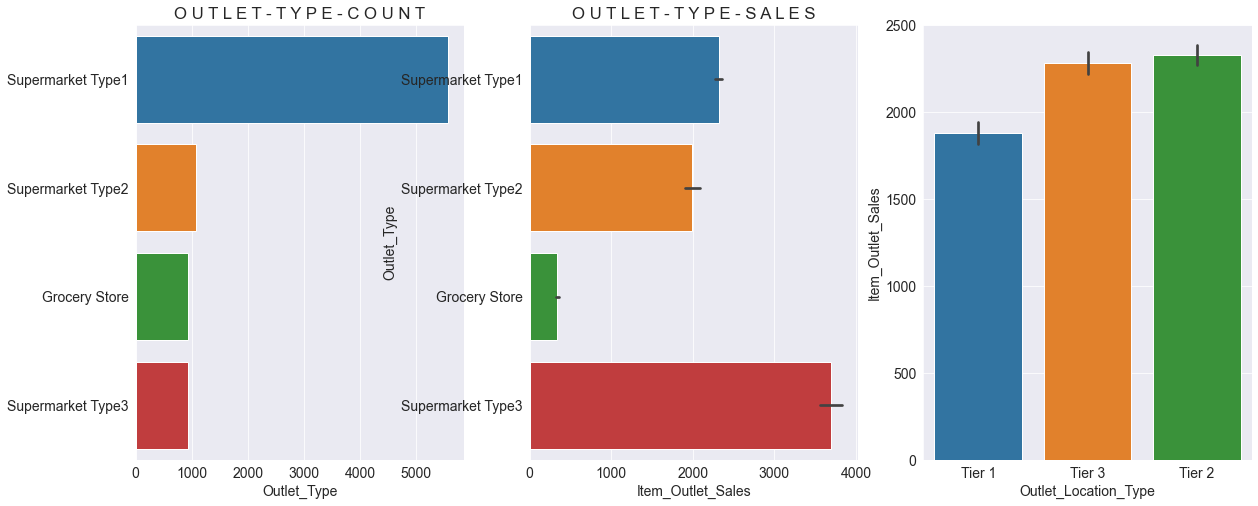

In [42]:
plt.rcParams['font.size'] =14
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,8))
sns.barplot(y=df['Outlet_Type'].unique(),x=df['Outlet_Type'].value_counts(), ax=ax1)
sns.barplot(y=df['Outlet_Type'],x=df['Item_Outlet_Sales'], ax=ax2)
sns.barplot(x=df['Outlet_Location_Type'],y=df['Item_Outlet_Sales'], ax=ax3)
ax1.set_title('O U T L E T - T Y P E - C O U N T')
ax2.set_title('O U T L E T - L O C A T I O N - S A L E S')
ax2.set_title('O U T L E T - T Y P E - S A L E S')
plt.show()

Total Number of Super Market-1:  5577


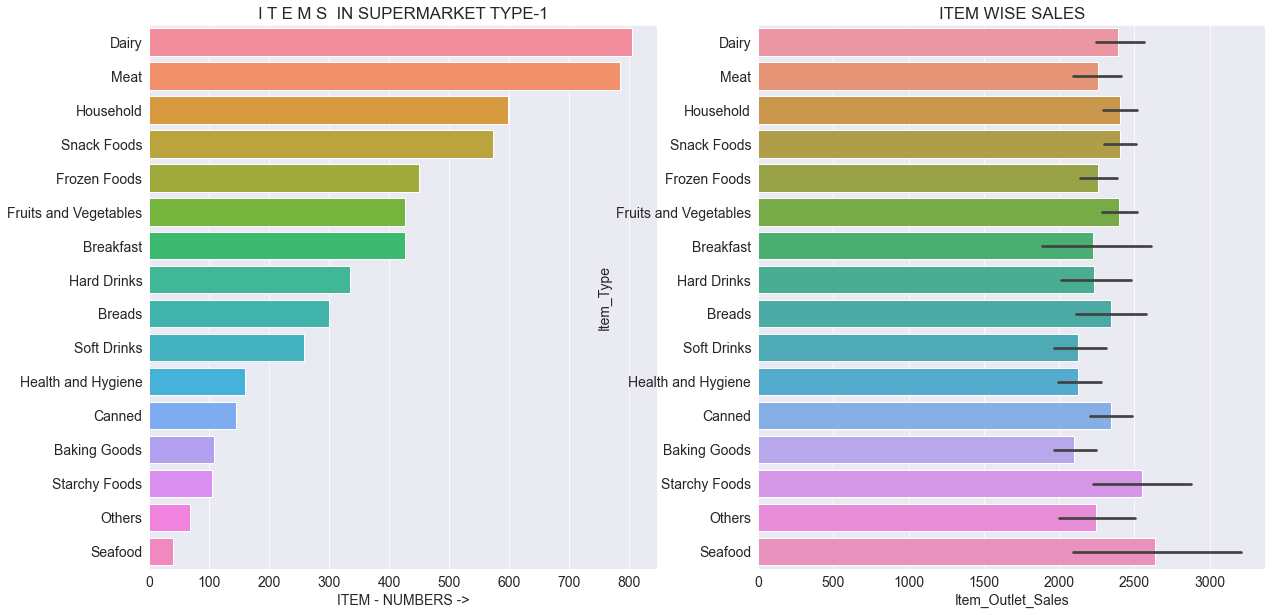

In [43]:
print('Total Number of Super Market-1: ',len(supermarket1))
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(y=supermarket1['Item_Type'].unique(),x=supermarket1['Item_Type'].value_counts(),saturation=0.9, ax=ax1)
ax1.set_title('I T E M S  IN SUPERMARKET TYPE-1')
ax1.set_xlabel('ITEM - NUMBERS ->')
sns.barplot(y=supermarket1['Item_Type'],x=supermarket1['Item_Outlet_Sales'], ax= ax2)
ax2.set_title('ITEM WISE SALES')
plt.show()

Total Number of Super Market Type-2:  928


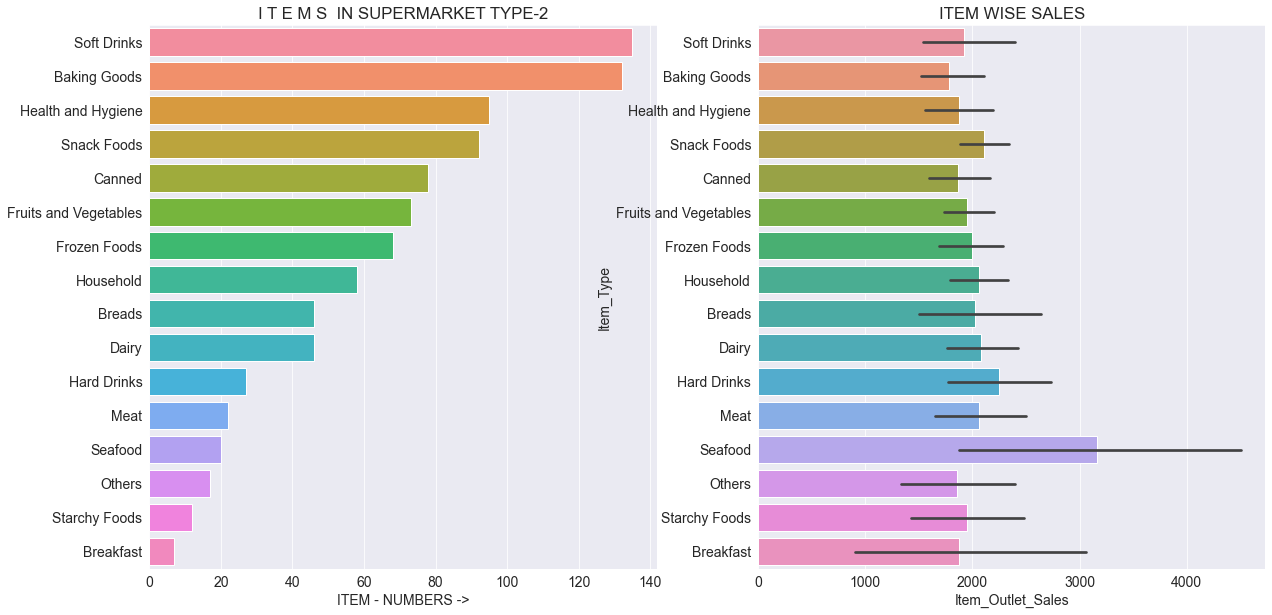

In [44]:
print('Total Number of Super Market Type-2: ',len(supermarket2))
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(y=supermarket2['Item_Type'].unique(),x=supermarket2['Item_Type'].value_counts(),saturation=0.9, ax=ax1)
ax1.set_title('I T E M S  IN SUPERMARKET TYPE-2')
ax1.set_xlabel('ITEM - NUMBERS ->')
sns.barplot(y=supermarket2['Item_Type'],x=supermarket2['Item_Outlet_Sales'], ax= ax2)
ax2.set_title('ITEM WISE SALES')
plt.show()

Total Number of Super Market-3:  935


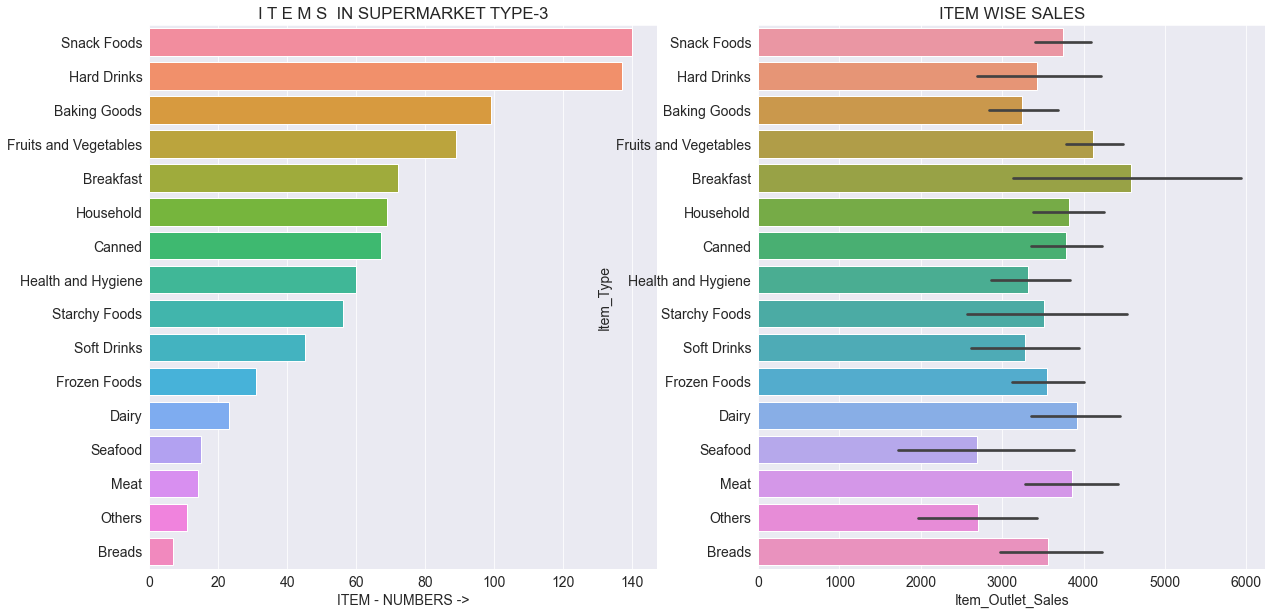

In [45]:
print('Total Number of Super Market-3: ',len(supermarket3))
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(y=supermarket3['Item_Type'].unique(),x=supermarket3['Item_Type'].value_counts(),saturation=0.9, ax=ax1)
ax1.set_title('I T E M S  IN SUPERMARKET TYPE-3')
ax1.set_xlabel('ITEM - NUMBERS ->')
sns.barplot(y=supermarket3['Item_Type'],x=supermarket3['Item_Outlet_Sales'], ax= ax2)
ax2.set_title('ITEM WISE SALES')
plt.show()

Total Number of Grocery Shop:  1083


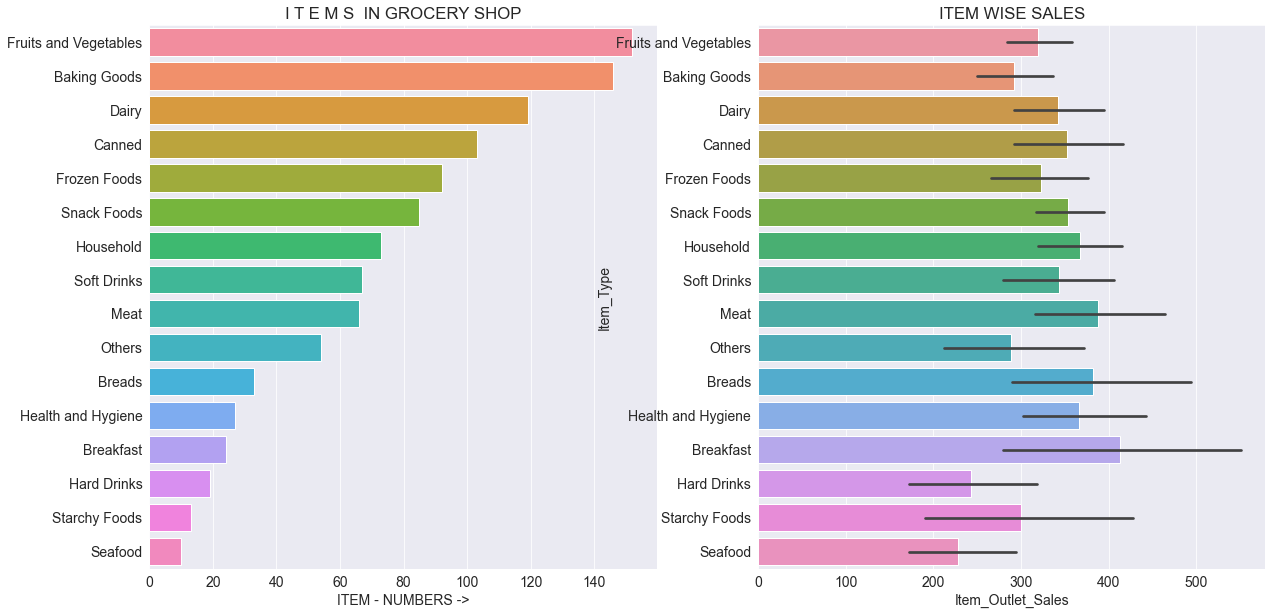

In [46]:
print('Total Number of Grocery Shop: ',len(grocery))
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(y=grocery['Item_Type'].unique(),x=grocery['Item_Type'].value_counts(),saturation=0.9, ax=ax1)
ax1.set_title('I T E M S  IN GROCERY SHOP')
ax1.set_xlabel('ITEM - NUMBERS ->')
sns.barplot(y=grocery['Item_Type'],x=grocery['Item_Outlet_Sales'], ax= ax2)
ax2.set_title('ITEM WISE SALES')
plt.show()

In [47]:
df.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

Total Sales According to Different Outlet Size:---


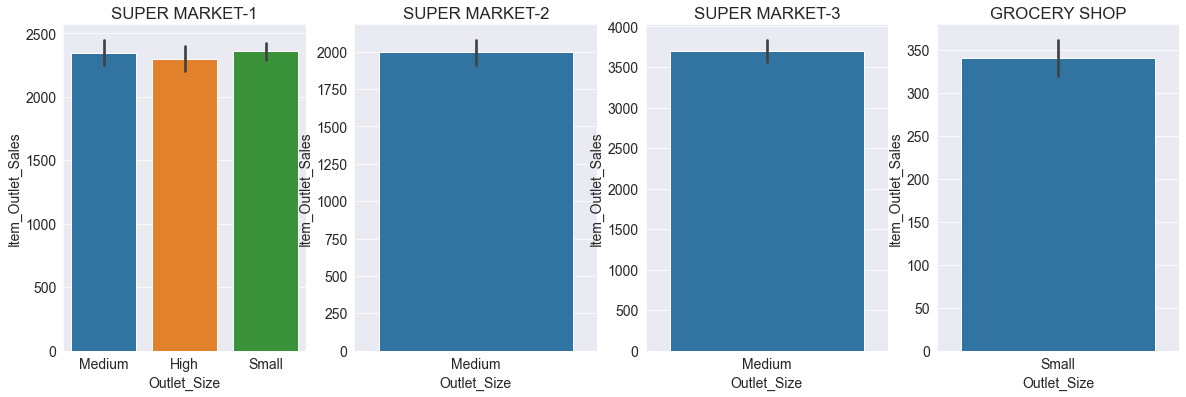

In [48]:
print('Total Sales According to Different Outlet Size:---')
plt.rcParams['font.size'] =14
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,6))
sns.barplot(x=supermarket1['Outlet_Size'],y=supermarket1['Item_Outlet_Sales'], ax= ax1)
sns.barplot(x=supermarket2['Outlet_Size'],y=supermarket2['Item_Outlet_Sales'], ax= ax2)
sns.barplot(x=supermarket3['Outlet_Size'],y=supermarket3['Item_Outlet_Sales'], ax= ax3)
sns.barplot(x=grocery['Outlet_Size'],y=grocery['Item_Outlet_Sales'], ax= ax4)

ax1.set_title('SUPER MARKET-1')
ax2.set_title('SUPER MARKET-2')
ax3.set_title('SUPER MARKET-3')
ax4.set_title('GROCERY SHOP')
plt.show()

Total Sales According to Different Location :---


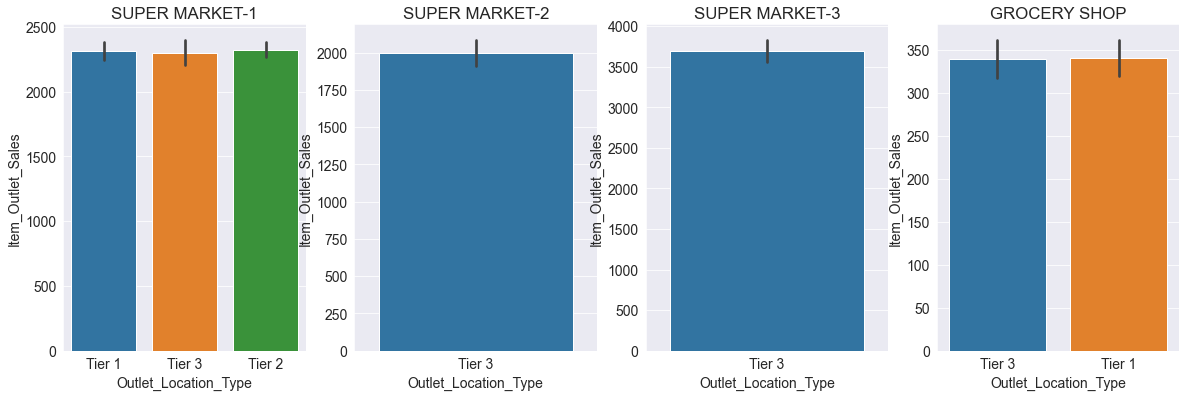

In [49]:
print('Total Sales According to Different Location :---')
plt.rcParams['font.size'] =14
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,6))
sns.barplot(x=supermarket1['Outlet_Location_Type'],y=supermarket1['Item_Outlet_Sales'], ax= ax1)
sns.barplot(x=supermarket2['Outlet_Location_Type'],y=supermarket2['Item_Outlet_Sales'], ax= ax2)
sns.barplot(x=supermarket3['Outlet_Location_Type'],y=supermarket3['Item_Outlet_Sales'], ax= ax3)
sns.barplot(x=grocery['Outlet_Location_Type'],y=grocery['Item_Outlet_Sales'], ax= ax4)

ax1.set_title('SUPER MARKET-1')
ax2.set_title('SUPER MARKET-2')
ax3.set_title('SUPER MARKET-3')
ax4.set_title('GROCERY SHOP')
plt.show()

In [50]:
loc1 = df[df['Outlet_Location_Type']== 'Tier 1']
loc2 = df[df['Outlet_Location_Type']== 'Tier 2']
loc3 = df[df['Outlet_Location_Type']== 'Tier 3']

TOTAL SALES ACCORDING TO FAT CONTENT IN DIFFERENT LOCATIONS:---


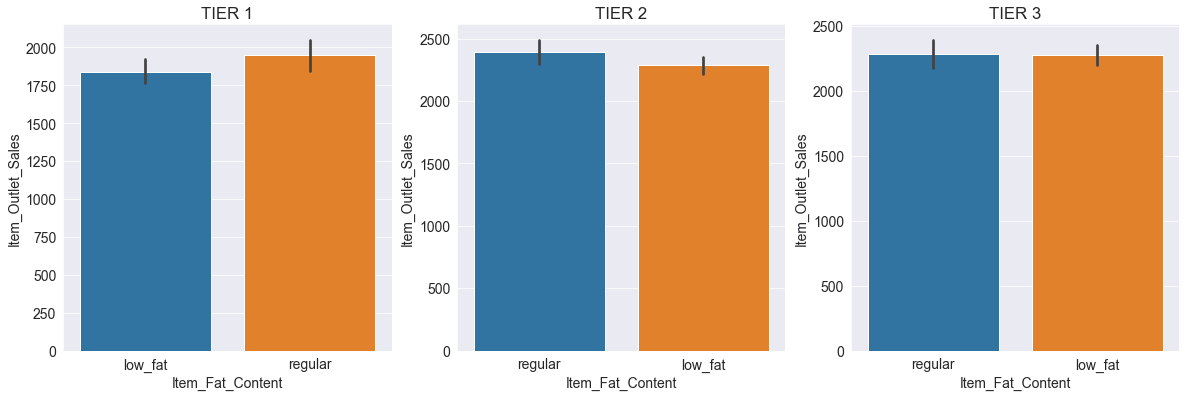

In [51]:
print('TOTAL SALES ACCORDING TO FAT CONTENT IN DIFFERENT LOCATIONS:---')
plt.rcParams['font.size'] =14
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
sns.barplot(x=loc1['Item_Fat_Content'],y=loc1['Item_Outlet_Sales'], ax= ax1)
sns.barplot(x=loc2['Item_Fat_Content'],y=loc2['Item_Outlet_Sales'], ax= ax2)
sns.barplot(x=loc3['Item_Fat_Content'],y=loc3['Item_Outlet_Sales'], ax= ax3)


ax1.set_title('TIER 1')
ax2.set_title('TIER 2')
ax3.set_title('TIER 3')

plt.show()

# EDA

In [52]:
import pandas_profiling as pp

In [53]:
profile = pp.ProfileReport(df)
profile.to_file("TrainDataProfile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
df['Item_Fat_Content'].value_counts()

low_fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [55]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [56]:
super1 = df[df['Outlet_Type'] =='Supermarket Type1']

In [57]:
super1['Item_Fat_Content'].value_counts()

low_fat    3609
regular    1968
Name: Item_Fat_Content, dtype: int64

**Deleted two columns 'Item_Identifier' and 'Outlet_Identifier'**

In [58]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [59]:
df.to_csv('cleaned_train.csv', index=None)

**Data Processing**

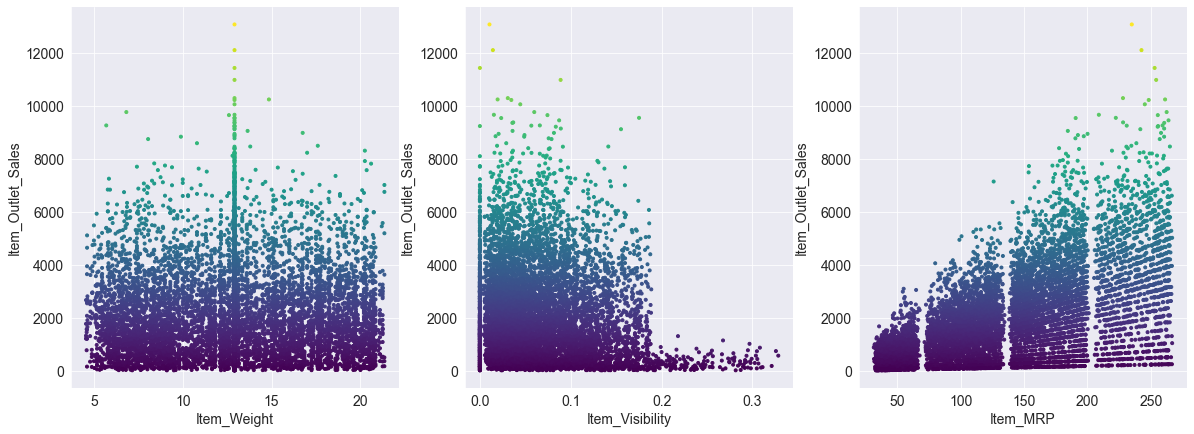

In [60]:
plt.rcParams['font.size'] =14
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,7))
ax1.scatter(df['Item_Weight'],df['Item_Outlet_Sales'],c=df['Item_Outlet_Sales'],marker='.',cmap='viridis')
ax2.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'],c=df['Item_Outlet_Sales'],marker='.',cmap='viridis')
ax3.scatter(df['Item_MRP'],df['Item_Outlet_Sales'],c=df['Item_Outlet_Sales'],marker='.',cmap='viridis')


ax1.set_xlabel('Item_Weight')
ax1.set_ylabel('Item_Outlet_Sales')
ax2.set_xlabel('Item_Visibility')
ax2.set_ylabel('Item_Outlet_Sales')
ax3.set_xlabel('Item_MRP')
ax3.set_ylabel('Item_Outlet_Sales')
sns.despine()
plt.show()

In [61]:
col = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']

In [62]:
list(df.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

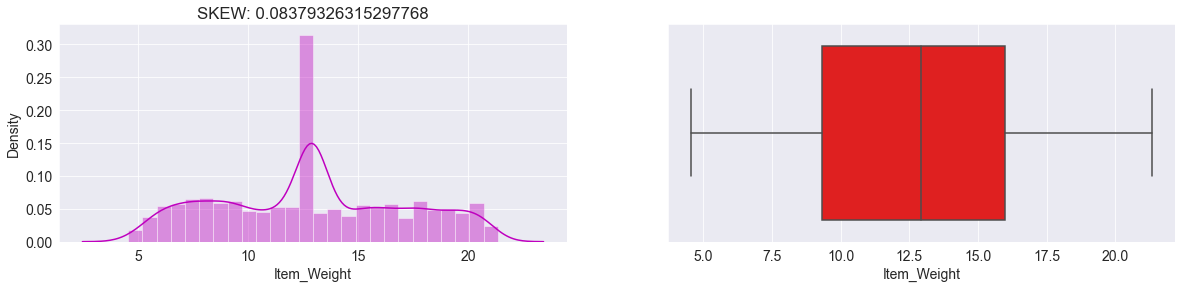

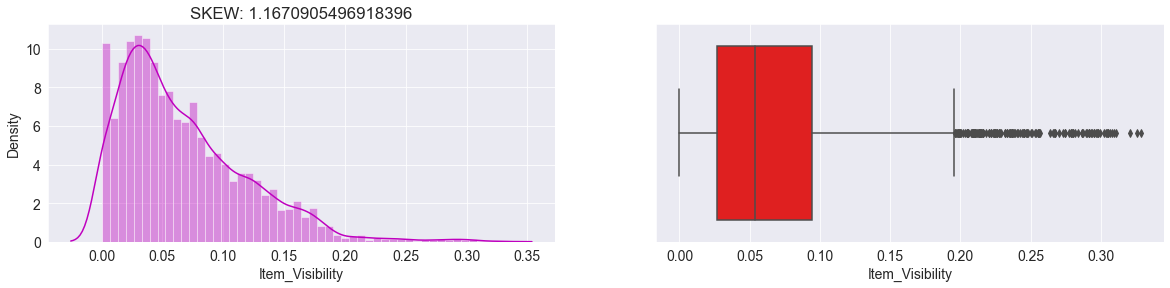

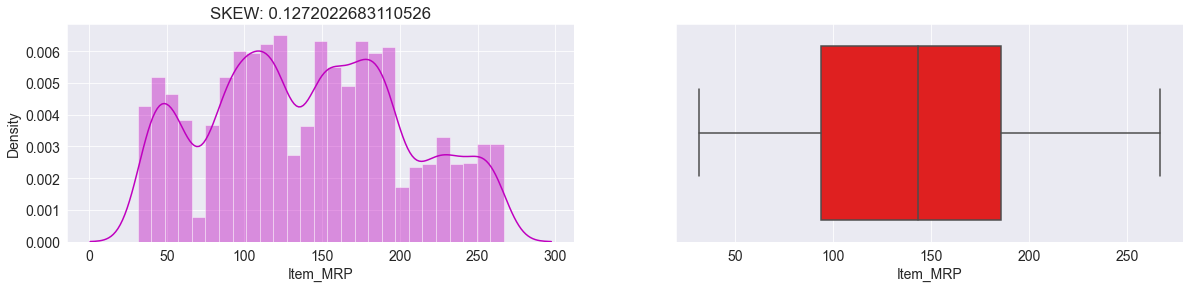

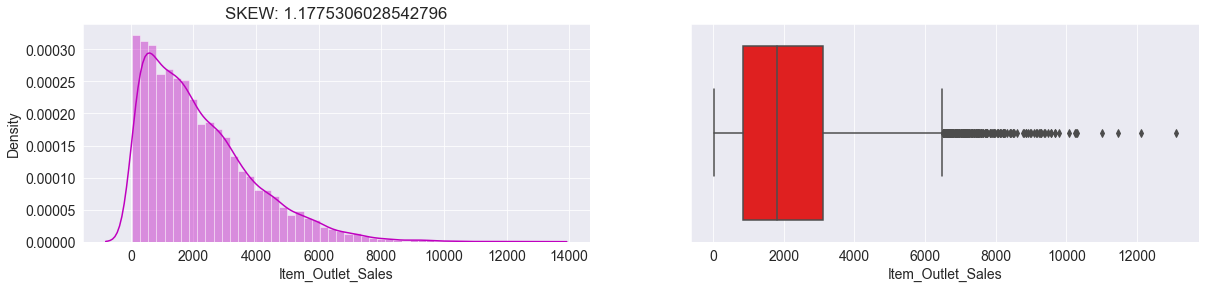

In [63]:
for cl in col:
    plt.rcParams['font.size'] =14
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,4))
    sns.distplot(df[cl],color='m', ax=ax1)
    ax1.set_title('SKEW: {}'.format(df[cl].skew()))
    sns.boxplot(df[cl],color='r', ax = ax2)
    plt.show()

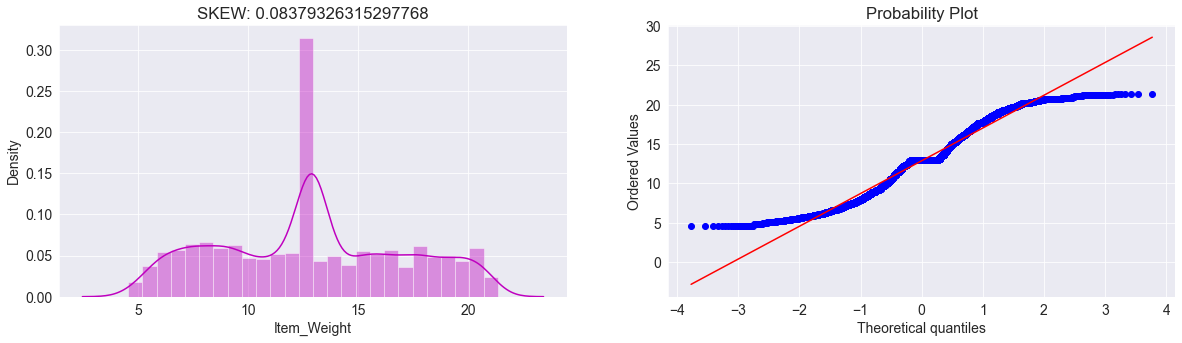

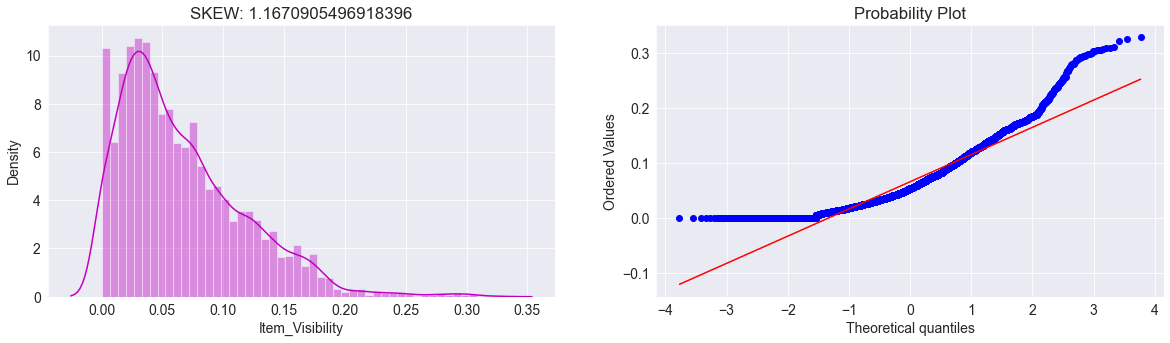

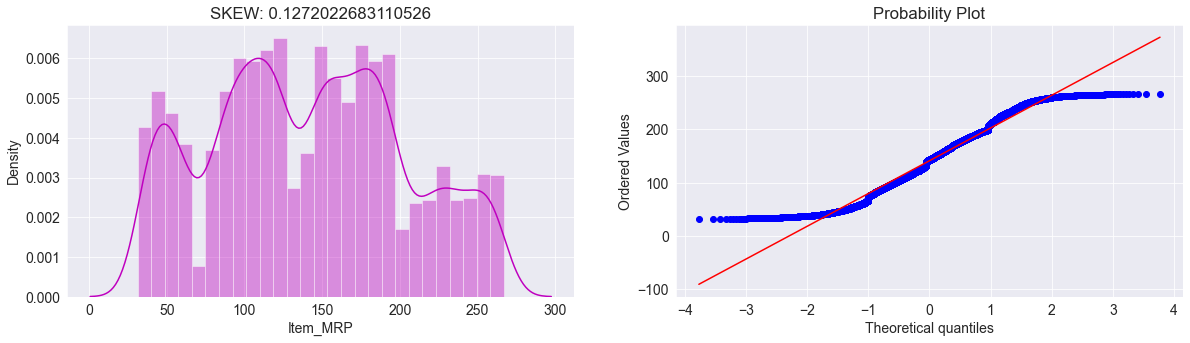

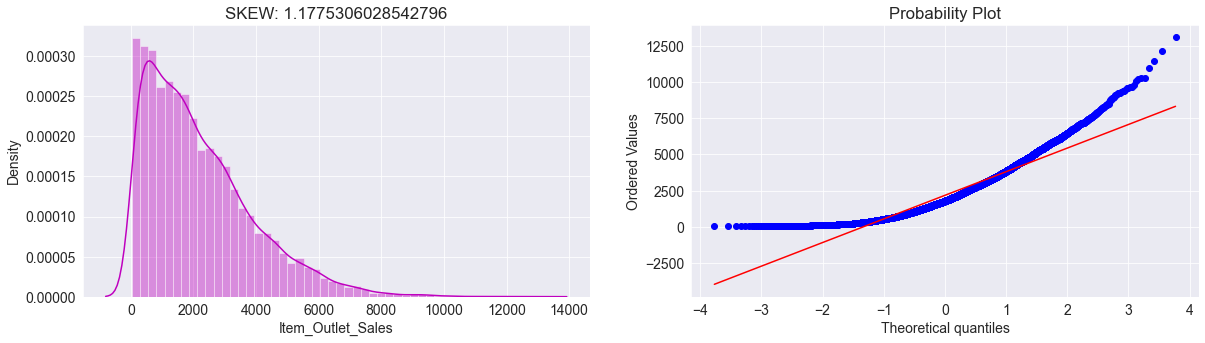

In [64]:
for cl in col:
    plt.rcParams['font.size'] =14
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
    sns.distplot(df[cl],color='m', ax=ax1)
    ax1.set_title('SKEW: {}'.format(df[cl].skew()))
    stats.probplot(df[cl], dist="norm", plot=plt)
    plt.show()

##### Data preprocessing

**1.deleting two unimportant columns**

In [65]:
del df['Item_Identifier'] , df['Outlet_Identifier']

**2.Modifying 'Outlet_Establishment_Year' length of year**

In [66]:
df.Outlet_Establishment_Year.min(), df.Outlet_Establishment_Year.max()

(1985, 2009)

In [67]:
df['Years'] = 2010 - df['Outlet_Establishment_Year']

In [68]:
del df['Outlet_Establishment_Year']

**3.label encoding**

In [69]:
df['Item_Fat_Content'].replace({'low_fat':1,'regular':2},inplace = True)
df['Outlet_Size'].replace({'Small':1,'Medium':2,'High':3},inplace = True)
df['Outlet_Location_Type'].replace({'Tier 1':3,'Tier 2':2,'Tier 3':1},inplace = True)
df['Outlet_Type'].replace({'Supermarket Type1':4,'Supermarket Type2':3,'Supermarket Type3':2,'Grocery Store':1},inplace = True)

In [70]:
len(df['Item_Type'].unique())

16

In [71]:
encoder = LabelEncoder()

In [72]:
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

In [73]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years
0,9.30,1,0.016047,4,249.8092,2,3,4,3735.1380,11
1,5.92,2,0.019278,14,48.2692,2,1,3,443.4228,1


**4.making log for towords normal distribution**

In [74]:
df['Item_Visibility'] = df['Item_Visibility']**0.5
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales']**0.5

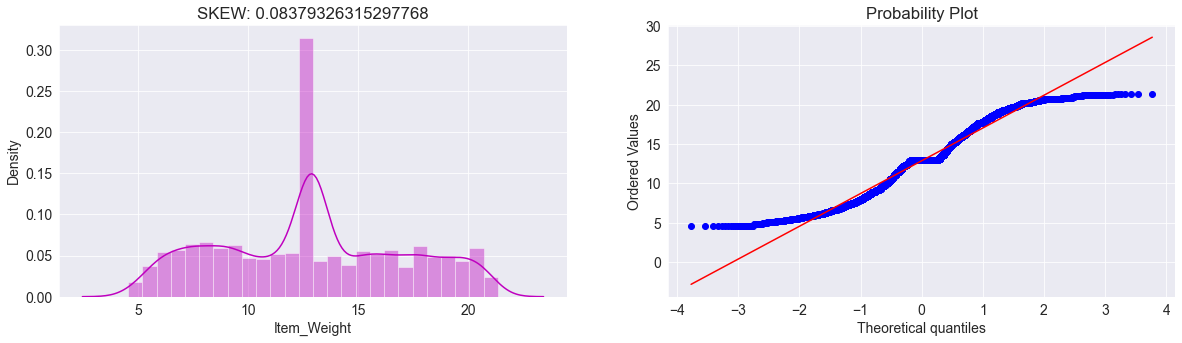

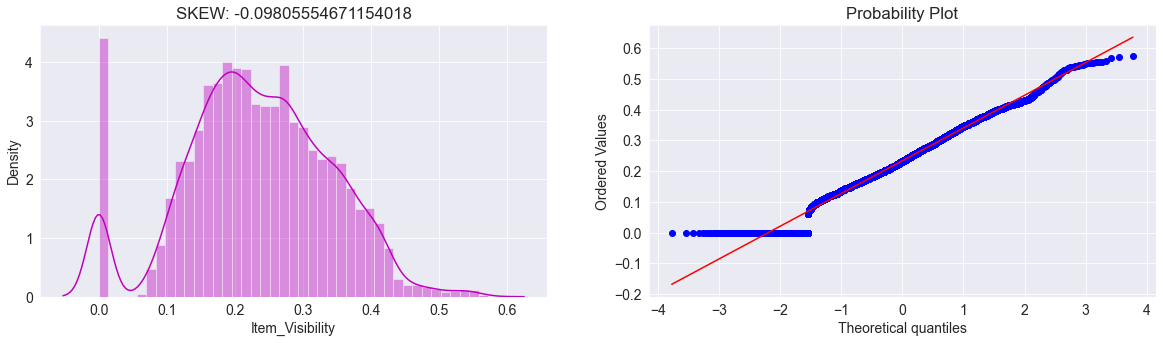

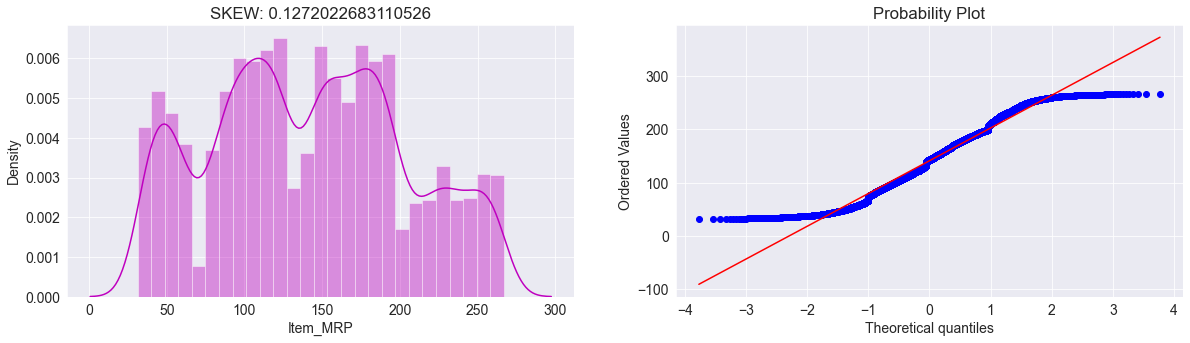

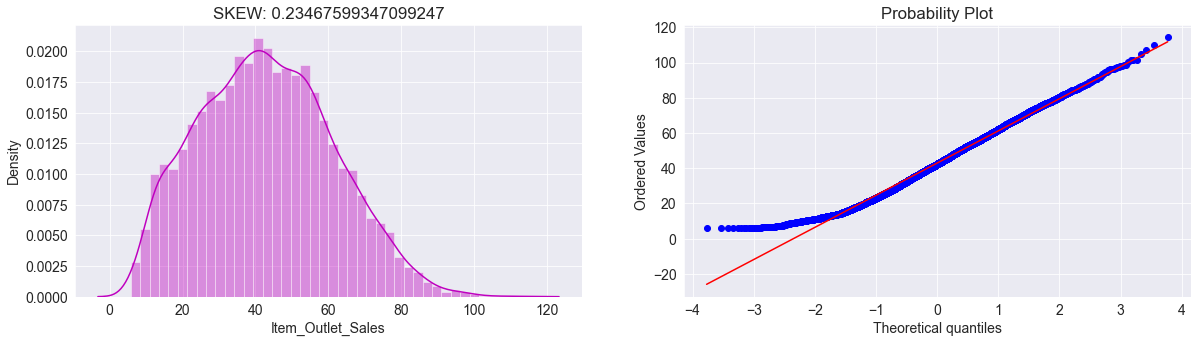

In [75]:
for cl in col:
    plt.rcParams['font.size'] =14
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
    sns.distplot(df[cl],color='m', ax=ax1)
    ax1.set_title('SKEW: {}'.format(df[cl].skew()))
    stats.probplot(df[cl], dist="norm", plot=plt)
    plt.show()

## Feature Selections / Feature importance

###### 1.Feature Corelation 

In [76]:
corr = df.corr()
out = corr[['Item_Outlet_Sales']]
out = out.sort_values(by='Item_Outlet_Sales',ascending=False)

In [77]:
out

,Item_Outlet_Sales
Item_Outlet_Sales,1.000000
Item_MRP,0.563434
Outlet_Type,0.327995
Outlet_Size,0.189842
Item_Type,0.019436
Item_Fat_Content,0.017384
Item_Weight,0.010927
Years,-0.007511
Outlet_Location_Type,-0.077149
Item_Visibility,-0.127308



   Feature Importance:


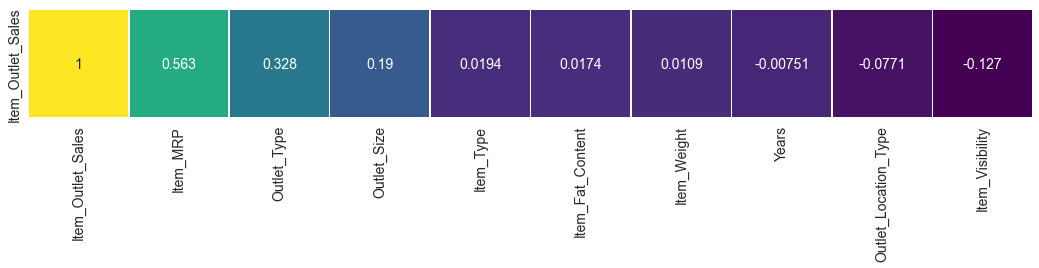

In [78]:
plt.rcParams['font.size'] =14
print("\n   Feature Importance:")
plt.figure(figsize=(18,2))
sns.heatmap(out.T,annot=True,fmt='.3g',linewidths=0.5,cbar=False,cmap='viridis')
plt.show()

In [79]:
del df['Years']

**From the above heatmap we can say that Item Weight , Item Type & Item Fat Content has very less corelation with Outlet Sales. So I can remove these three items.**

**Also we can see that there are 4 columns 'Outlet_Establishment_Year','Item_Visibility','Outlet_Location_Type' ,'Outlet_Establishment_Year' are negatively related with the 'Item_Outlet_Sales'**

##### 2.Feature Selection LASSO Method

In [80]:
y = df['Item_Outlet_Sales'].copy()

In [81]:
x = df.drop(['Item_Outlet_Sales'],axis=1).copy()

In [82]:
lasso = Lasso(alpha=0.1, max_iter=2000)
lasso.fit(x,y)

Lasso(alpha=0.1, max_iter=2000)

In [83]:
print(x.columns)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [84]:
coeff_values = pd.DataFrame({'coeff':lasso.coef_},index=x.columns).sort_values(by='coeff')
c = (abs(coeff_values.coeff) > 0)
col_imp = list(x.columns[c])
print("Important columns according to Lasso regression :-\n")
for i in col_imp:
    print(i)

Important columns according to Lasso regression :-

Item_Weight
Item_Fat_Content
Item_Visibility
Item_MRP
Outlet_Size
Outlet_Location_Type
Outlet_Type


**so according to Lasso method we can find there is no duplicate features**

**3. Removal of Constant and Quasi constant from 9 features if any**

In [85]:
def Const_remove(x):
    const = VarianceThreshold(threshold=0.01)
    const.fit(x)
    c = const.get_support()
    feature_important = x.columns[c]
    print("Reduced :",(len(x.columns)-len(feature_important)), 'columns')
    return x[feature_important]

In [86]:
important_features = Const_remove(x)
print('Important Features:\n',important_features.columns)

Reduced : 0 columns
Important Features:
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [87]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

#### 4. Duplicate Removal if any

In [88]:
def dupRemove(X):
    xt = X.T
    d = xt.duplicated()
    d1 = []
    for i in d:
        if i != True:
            d1.append(True)
    cln = X.columns[d1]
    print('Number of duplicade columns removed:',d.sum())
    return list(cln)   

In [89]:
duplicate = dupRemove(x)

Number of duplicade columns removed: 0


In [90]:
x_columns = list(x.columns)
x_columns

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [91]:
del df

# model building and evaluation

**1. Making Pipeline**

In [92]:
df = pd.read_csv('cleaned_train.csv')

In [93]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [94]:
X = df[x_columns].copy()

In [95]:
X['Outlet_Size'].replace({'Small':1,'Medium':2,'High':3},inplace = True)
X['Outlet_Location_Type'].replace({'Tier 1':3,'Tier 2':2,'Tier 3':1},inplace = True)
X['Outlet_Type'].replace({'Supermarket Type1':4,'Supermarket Type2':3,'Supermarket Type3':2,'Grocery Store':1},inplace = True)

In [96]:
X.sample(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4102,13.600000,regular,0.043744,Fruits and Vegetables,157.7946,1,2,4
7070,12.913153,low_fat,0.080742,Meat,220.8798,2,1,2
1776,12.913153,low_fat,0.148765,Snack Foods,111.1912,1,3,1


In [97]:
Y = df['Item_Outlet_Sales']

In [98]:
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.1, random_state=42)

In [99]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4608,12.913153,regular,0.075142,Breads,145.8444,2,1,2
4527,15.100000,low_fat,0.095696,Baking Goods,159.7604,1,2,4
6426,11.150000,low_fat,0.073667,Others,66.2142,2,1,3
2918,16.100000,regular,0.025051,Fruits and Vegetables,97.1410,2,1,3
4920,8.000000,regular,0.050657,Breads,249.9092,1,1,1
...,...,...,...,...,...,...,...,...
5734,9.395000,regular,0.286345,Fruits and Vegetables,139.1838,1,1,1
5191,15.600000,low_fat,0.117575,Frozen Foods,75.6670,1,2,4
5390,17.600000,low_fat,0.018944,Health and Hygiene,237.3590,1,2,4
860,20.350000,low_fat,0.054363,Snack Foods,117.9466,1,2,4


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [102]:
trans1 = ColumnTransformer([('fat_content_and_item_type',
                             OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,3])
                           ],remainder='passthrough')

In [103]:
trans2 = ColumnTransformer([('sqrt',FunctionTransformer(func=lambda y: y**0.5),[2])],remainder='passthrough')

In [104]:
pipe = Pipeline([
    ('trans1',trans1),
    ('trans2',trans2)
])

In [105]:
x_train = pipe.fit_transform(x_train)
x_train.shape

(7670, 24)

In [106]:
x_val = pipe.transform(x_val)
x_val.shape

(853, 24)

In [107]:
trans3 = FunctionTransformer(func=lambda y: y**0.5)

In [108]:
y_train = trans3.fit_transform(y_train)

In [109]:
y_val = trans3.transform(y_val)

#### 2.Modeling with Xgb-regressor

In [110]:
xg_model = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [111]:
len(x_train), len(y_val)

(7670, 853)

In [112]:
def evaluate(model):
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    val_pred = model.predict(x_val)
    val_rmse = mean_squared_error(y_val, val_pred, squared=False)
    r2_train= r2_score(y_train, train_pred)
    r2_val = r2_score(y_val, val_pred)
    print('train RMSE                 :', train_rmse)
    print('validatin RMSE             :', val_rmse)
    print('R2 Score on Validation data:',r2_val)
    print('R2 Score on training data  :',r2_train)
    return model

In [113]:
evaluate(xg_model)

train RMSE                 : 7.373033365013015
validatin RMSE             : 10.694769977696014
R2 Score on Validation data: 0.6541159621451079
R2 Score on training data  : 0.8390262555445863


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [114]:
grid = {'n_estimators':[80,100,120,130,140],
               'max_depth': [1,2,3,4,5],
       'learning_rate':[0.1,0.2]}

In [115]:
xgbr = RandomizedSearchCV(estimator = xg_model, param_distributions = grid,
                          scoring='neg_mean_squared_error', n_iter = 20, cv = 5, verbose = 1, n_jobs = 1)

In [116]:
xgbr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          max_leaves=0, min_child_weight=1,
                                          missing=nan,
                 

In [117]:
xgbr.best_params_

{'n_estimators': 80, 'max_depth': 3, 'learning_rate': 0.1}

In [118]:
model_xgb = XGBRegressor(n_estimators= 80, max_depth= 3, random_state=42, 
                         n_jobs=-1,learning_rate=0.1, objective='reg:squarederror')

In [119]:
model1 = evaluate(model_xgb)

train RMSE                 : 10.229005146190406
validatin RMSE             : 10.116859462423445
R2 Score on Validation data: 0.6904868836813796
R2 Score on training data  : 0.6901657372169075


#### 3.Modeling With LGBR

In [120]:
params = {
    'objective': 'regression',
    'max_bin': [200],
    'learning_rate': [0.0125],
    'num_leaves': [30],
}

In [121]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_val, y_val,reference=lgb_train)
model_lgb = lgb.train(params, lgb_train,
                      valid_sets=[lgb_train, lgb_eval],
                      verbose_eval=10,
                      num_boost_round=10000,
                      early_stopping_rounds=20)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 7670, number of used features: 24
[LightGBM] [Info] Start training from score 43.005249
Training until validation scores don't improve for 20 rounds
[10]	training's l2: 286.695	valid_1's l2: 279.896
[20]	training's l2: 246.937	valid_1's l2: 239.965
[30]	training's l2: 215.937	valid_1's l2: 208.944
[40]	training's l2: 191.751	valid_1's l2: 184.807
[50]	training's l2: 172.797	valid_1's l2: 165.97
[60]	training's l2: 157.97	valid_1's l2: 151.366
[70]	training's l2: 146.366	valid_1's l2: 140.069
[80]	training's l2: 137.249	valid_1's l2: 131.261
[90]	training's l2: 130.082	valid_1's l2: 124.376
[100]	training's l2: 124.423	valid_1's l2: 118.985
[110]	training's l2: 119.926	valid_1's l2: 114.751
[120]	training's l2: 116.344	valid_1's l2: 11

In [122]:
def evaluate_lgb(model):
    train_pred = model.predict(x_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    val_pred = model.predict(x_val)
    val_rmse = mean_squared_error(y_val, val_pred, squared=False)
    r2_train= r2_score(y_train, train_pred)
    r2_val = r2_score(y_val, val_pred)
    print('train RMSE                 :', train_rmse)
    print('validatin RMSE             :', val_rmse)
    print('R2 Score on Validation data:',r2_val)
    print('R2 Score on training data  :',r2_train)
    return model

In [123]:
model2 = evaluate_lgb(model_lgb)

train RMSE                 : 9.90860933732063
validatin RMSE             : 10.047847589915362
R2 Score on Validation data: 0.6946951513182393
R2 Score on training data  : 0.7092711971381669


In [124]:
def ensembled_of_models(model1, model2):
    model1.fit(x_train, y_train)
    train_pred1 = model1.predict(x_train)
    val_pred1 = model1.predict(x_val)
    
    train_pred2 = model2.predict(x_train)
    val_pred2 = model2.predict(x_val)
    
    train_pred = (train_pred1+train_pred2)/2
    val_pred = (val_pred1 + val_pred1)/2
    
    r2_train= r2_score(y_train, train_pred)
    r2_val = r2_score(y_val, val_pred)
    
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    val_rmse = mean_squared_error(y_val, val_pred, squared=False)
    
    print('R2 Score on Validation data:',r2_val)
    print('R2 Score on training data  :',r2_train)
    print('train RMSE                 :', train_rmse)
    print('validatin RMSE             :', val_rmse)
    return val_pred   

In [125]:
val_pred = ensembled_of_models(model1, model2)

R2 Score on Validation data: 0.6904868836813796
R2 Score on training data  : 0.7009277980983141
train RMSE                 : 10.049783364436493
validatin RMSE             : 10.116859462423445


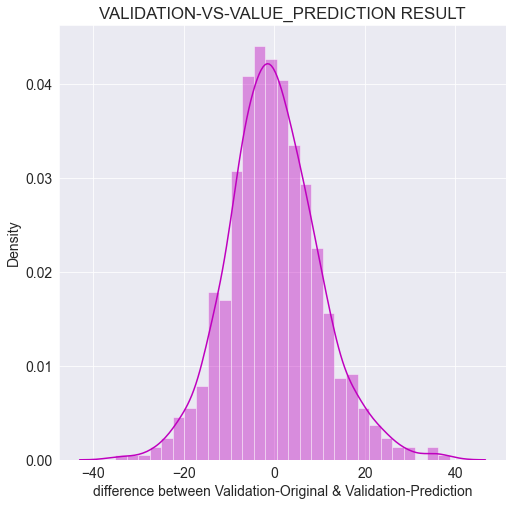

In [126]:
difference = (val_pred-y_val)
plt.figure(figsize=(8,8))
sns.distplot(difference, color='m')
plt.title('VALIDATION-VS-VALUE_PREDICTION RESULT')
plt.xlabel('difference between Validation-Original & Validation-Prediction')
plt.show()

##### Saving both the models

In [127]:
# Xgb-model
file = open('modelXgb.pkl', 'wb')
# dump information to that file
pickle.dump(model1, file)

In [128]:
# Lgb-model
file = open('modelLgb.pkl', 'wb')
# dump information to that file
pickle.dump(model2, file)

## Working with test data

In [129]:
df_test = pd.read_csv('Test.csv')
df_test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


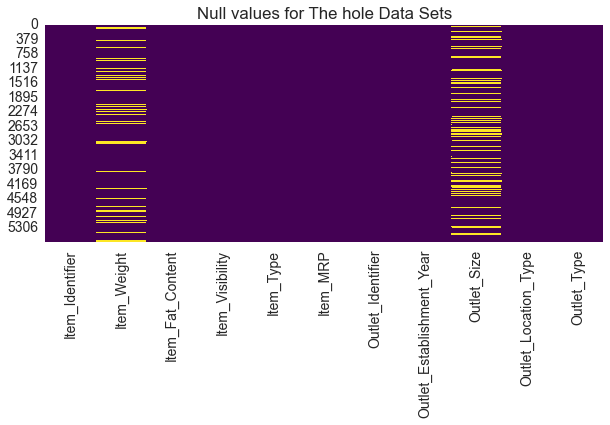

In [130]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(df_test.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The hole Data Sets')
plt.show()

In [131]:
super1 = df_test[df_test['Outlet_Type'] =='Supermarket Type1']
super2 = df_test[df_test['Outlet_Type'] =='Supermarket Type2']
super3 = df_test[df_test['Outlet_Type'] =='Supermarket Type3']
groc = df_test[df_test['Outlet_Type'] =='Grocery Store']

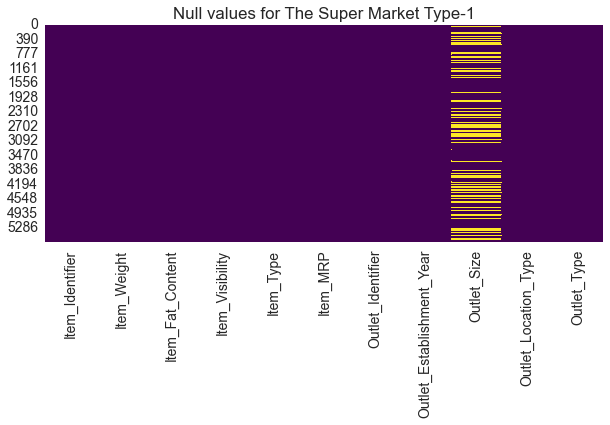

In [132]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(super1.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The Super Market Type-1')
plt.show()

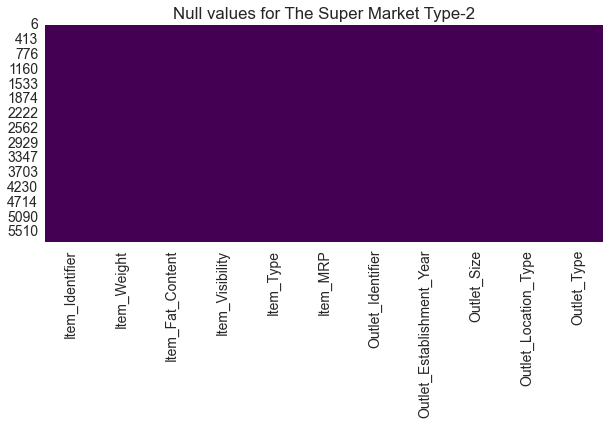

In [133]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(super2.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The Super Market Type-2')
plt.show()

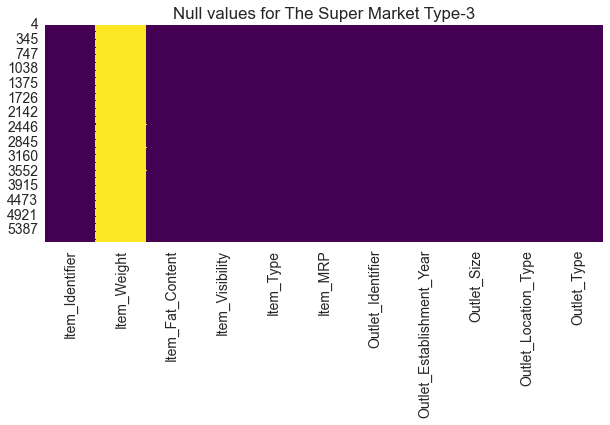

In [134]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(super3.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The Super Market Type-3')
plt.show()

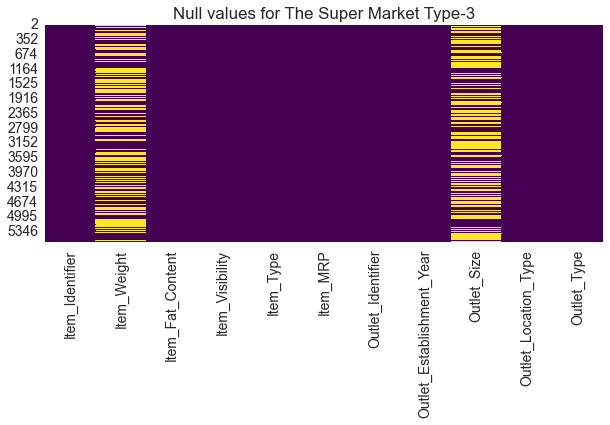

In [135]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(groc.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The Super Market Type-3')
plt.show()

In [136]:
print('Type of Outlet Size:',df_test.Outlet_Size.unique())

Type of Outlet Size: ['Medium' nan 'Small' 'High']


In [137]:
print('Outlet Locations:',df_test.Outlet_Location_Type.unique())

Outlet Locations: ['Tier 1' 'Tier 2' 'Tier 3']


In [138]:
super1[super1['Outlet_Location_Type'] == 'Tier 2'].isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1236
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [139]:
super1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1236
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [140]:
groc['Outlet_Location_Type'].unique()

array(['Tier 3', 'Tier 1'], dtype=object)

In [141]:
groc[groc['Outlet_Location_Type'] == 'Tier 1'].isnull().sum()

Item_Identifier                0
Item_Weight                  352
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [142]:
groc[groc['Outlet_Location_Type'] == 'Tier 3'].isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  370
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [143]:
groc[groc['Outlet_Location_Type'] == 'Tier 3'].Outlet_Size.unique()

array([nan], dtype=object)

In [144]:
super1[super1['Outlet_Location_Type'] == 'Tier 2'].Outlet_Size.unique()

array([nan, 'Small'], dtype=object)

In [145]:
df_test.Outlet_Size.fillna("Small",inplace= True)

In [146]:
df_test.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [147]:
df_test.Item_Weight.isna().sum()

976

In [148]:
super3.shape

(624, 11)

In [149]:
super3.Item_Weight.isna().sum()

624

In [150]:
groc.Item_Weight.shape

(722,)

In [151]:
groc.Item_Weight.isna().sum()

352

In [152]:
groc.Item_Weight.mean()

12.437445945945953

In [153]:
df_test.Item_Weight.fillna(groc.Item_Weight.mean(), inplace = True)

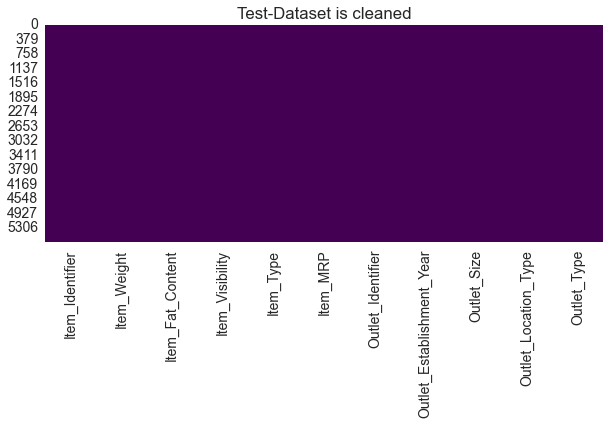

In [154]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(df_test.isnull(),cmap='viridis',cbar=False)
plt.title('Test-Dataset is cleaned')
plt.show()

In [155]:
df_test['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [156]:
df_test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [157]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].map({'Low Fat':'low_fat','low fat':'low_fat','LF':'low_fat','reg':'regular','Regular':'regular'})

In [158]:
df_test.Item_Fat_Content.unique()

array(['low_fat', 'regular'], dtype=object)

In [159]:
test = df_test[x_columns].copy()

In [160]:
del df_test

In [161]:
test.sample(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
3085,12.437446,low_fat,0.000000,Health and Hygiene,42.9086,Small,Tier 1,Grocery Store
1898,7.760000,low_fat,0.059688,Snack Foods,99.4700,Small,Tier 2,Supermarket Type1


In [162]:
test.to_csv('cleaned_test.csv', index=None)

In [163]:
del test

### prediction with test Data

In [164]:
test = pd.read_csv('cleaned_test.csv')

In [165]:
test.sample(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4934,15.7,low_fat,0.056077,Health and Hygiene,152.1024,Medium,Tier 1,Supermarket Type1
1518,15.7,regular,0.063378,Frozen Foods,126.2046,Small,Tier 3,Grocery Store


In [166]:
def prediction_pipeline(test, model1, model2):
    test['Outlet_Size'].replace({'Small':1,'Medium':2,'High':3},inplace = True)
    test['Outlet_Location_Type'].replace({'Tier 1':3,'Tier 2':2,'Tier 3':1},inplace = True)
    test['Outlet_Type'].replace({'Supermarket Type1':4,'Supermarket Type2':3,
                                 'Supermarket Type3':2,'Grocery Store':1},inplace = True)
    
    test = pipe.transform(test)
    
    val_pred1 = model1.predict(test)
    val_pred2 = model2.predict(test)
    
    val_pred = (val_pred1 + val_pred1)/2
    
    return val_pred**2
    

In [167]:
results = prediction_pipeline(test, model1, model2)

In [168]:
results.shape

(5681,)

##### Loading original Test Data

In [169]:
test_data_original = pd.read_csv('Test.csv')

In [170]:
test_data_original['Item_Outlet_Sales'] = results

In [171]:
test_data_original.to_csv('test_results.csv', index=None)

In [172]:
Df = pd.read_csv('test_results.csv')
Df.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5435,FDY22,NaN,Regular,0.279650,Snack Foods,143.4128,OUT019,1985,Small,Tier 1,Grocery Store,317.58176
5326,FDJ46,11.100,Low Fat,0.000000,Snack Foods,174.3054,OUT045,2002,NaN,Tier 2,Supermarket Type1,2783.28690
3186,FDV38,19.250,Low Fat,0.101774,Dairy,52.8956,OUT046,1997,Small,Tier 1,Supermarket Type1,799.70600
2030,FDW33,9.395,Low Fat,0.099524,Snack Foods,107.3280,OUT018,2009,Medium,Tier 3,Supermarket Type2,1383.96350


# ____________________ THANKS _________________________@ Swati Sinha